In [37]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.filters as flt
import scipy.ndimage as img
from skimage import io
import os
from matplotlib.pyplot import figure
from numpy import genfromtxt

In [7]:
folder = "PSI/Novembre_2021/Position_1_tif/Reslice_Siemens/"

In [3]:
def resolution_evaluator(name):
    image=plt.imread(folder+str(name)+".tif")
    '''
    plt.imshow(image)
    plt.show()
    plt.close()
    '''
    minrange = []
    maxrange = []
    average = []
    standard = []
    factor = 250/len(image[1,:])
    for i in range(len(image[1,:])):
        minrange.append(np.min(image[25:325,i]))
        maxrange.append(np.max(image[25:325,i]))
        average.append(np.average(image[25:325,i]))
        standard.append(np.std(image[25:325,i]))
    '''
    #plt.plot(image[200:300,200])
    plt.plot([i*factor for i in range(len(image[1,:]))],minrange,label="min")
    plt.plot([i*factor for i in range(len(image[1,:]))],maxrange,label="max")
    plt.plot([i*factor for i in range(len(image[1,:]))],average,label="average")
    plt.xlabel("Resolution ($\mu$m)")
    plt.show()
    plt.close()
    plt.plot([i*factor for i in range(len(image[1,:]))],standard/np.max(standard),label="std")
    plt.xlabel("Resolution ($\mu$m)")
    plt.locator_params(axis="x",nbins=20)
    plt.show()
    plt.close()
    '''
    indices = []
    for i in range(len(average)):
        if average[i] > np.average(average[200:230])+20 or average[i]<np.average(average[200:230])-5:
            indices.append(i)

    j,i=0,0
    minmax_average = []
    while j<40:
        if i not in indices: 
            minmax_average.append(maxrange[i]-minrange[i])
            j+=1
        i+=1
    average_number = np.average(minmax_average)
    standard_number = np.std(minmax_average)
    for i in range(len(standard)):
        if i not in indices and maxrange[i]-minrange[i]>average_number+(standard_number*2) and i>50: 
            print("Resolution",i*factor)
            break;

In [115]:
name_array = ["Boa432","Boa433","Boa439","Boa440"]
for name in name_array:
    resolution_evaluator(name)

Resolution 60.70287539936103
Resolution 59.105431309904155
Resolution 108.69565217391305
Resolution 61.03678929765886


In [111]:
resolution_evaluator("Boa439")

In [18]:

def single_image(image):
    minrange = []
    maxrange = []
    average = []
    standard = []
    contrast = []
    factor = 250/len(image[1,:])
    for i in range(len(image[1,:])):
        minrange.append(np.min(image[25:325,i]))
        maxrange.append(np.max(image[25:325,i]))
        average.append(np.average(image[25:325,i]))
        standard.append(np.std(image[25:325,i]))
    for i in range(len(maxrange)):
        contrast.append(maxrange[i]-minrange[i])
    '''
    plt.plot([i*factor for i in range(len(image[1,:]))],contrast)
    plt.show()
    plt.close()
    
    #plt.plot(image[200:300,200])
    plt.plot([i*factor for i in range(len(image[1,:]))],minrange,label="min")
    plt.plot([i*factor for i in range(len(image[1,:]))],maxrange,label="max")
    plt.plot([i*factor for i in range(len(image[1,:]))],average,label="average")
    plt.xlabel("Resolution ($\mu$m)")
    plt.show()
    plt.close()
    
    plt.plot([i*factor for i in range(len(image[1,:]))],standard/np.max(standard),label="std")
    plt.xlabel("Resolution ($\mu$m)")
    plt.locator_params(axis="x",nbins=25)
    plt.xlim(30,250)
    plt.show()
    plt.close()
    '''
    indices = []
    for i in range(len(average)):
        if average[i] > np.average(average[200:230])+20 or average[i]<np.average(average[200:230])-5:
            indices.append(i)

    j,i=0,0
    minmax_average = []
    while j<40:
        if i not in indices: 
            minmax_average.append(maxrange[i]-minrange[i])
            j+=1
        i+=1
    average_number = np.average(minmax_average)
    standard_number = np.std(minmax_average)
    reweight = []
    for j in range(len(standard)-10):
        i = j+5
        reweight.append(np.average(standard[i-5:i+5]))

    
    average = np.average(reweight[20:70]/np.max(reweight))
    std = np.std(reweight[20:70]/np.max(reweight))
    for i in range(len(reweight)):
        if reweight[i]/np.max(reweight) > average+2*std and i*factor>60:
            #print("Resolution",i*factor)
            break;
    plt.plot([(i+5)*factor for i in range(len(image[1,:])-10)],reweight/np.max(reweight))
    plt.plot([(i+5)*factor for i in range(len(image[1,:])-10)],[average+2*std for i in range(len(image[1,:])-10)])
    plt.locator_params(axis="x",nbins=20)
    plt.xlabel("Resolution ($\mu m$)")
    plt.ylabel("Normalised standard deviation")
    plt.show()
    plt.close()
    
    return(i*factor)

Test375


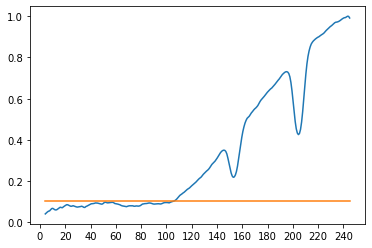

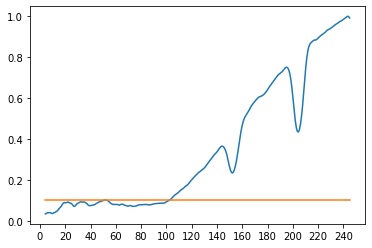

Vertical 100.08445945945945


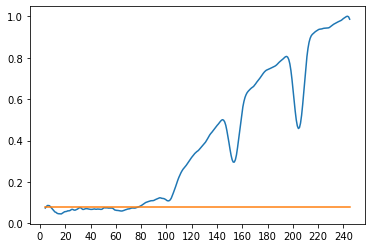

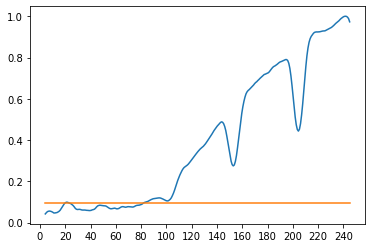

Horizontal 75.59121621621622


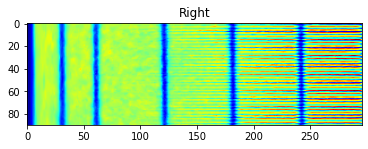

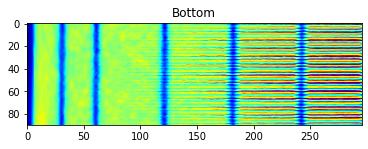

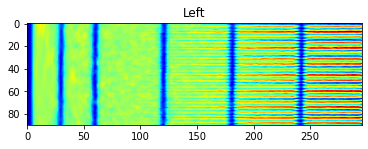

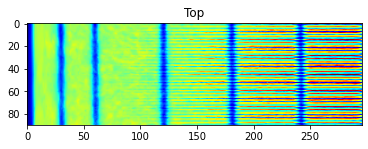

In [14]:
folder = "PSI/Novembre_2021/Position_3_tif/Reslice_Siemens/"
image=plt.imread(folder+"Test578"+".tif")

image1 = image[:int(len(image)/4),:]
image2 = image[int(len(image)/4):2*int(len(image)/4),:]
image3 = image[2*int(len(image)/4):3*int(len(image)/4),:]
image4 = image[3*int(len(image)/4):,:]
print(element)
print("Vertical",(single_image(image1)+single_image(image3))/2)
print("Horizontal",(single_image(image2)+single_image(image4))/2)
print("======")
plt.imshow(image1,cmap="jet")
plt.title("Right")
plt.show()
plt.close()
plt.imshow(image2,cmap="jet")
plt.title("Bottom")
plt.show()
plt.close()
plt.imshow(image3,cmap="jet")
plt.title("Left")
plt.show()
plt.close()
plt.imshow(image4,cmap="jet")
plt.title("Top")
plt.show()
plt.close()

Test360


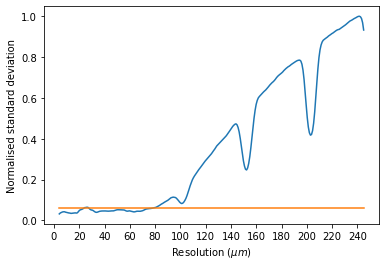

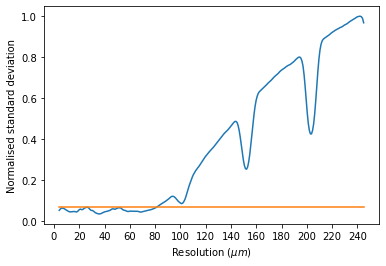

Vertical 76.59932659932662


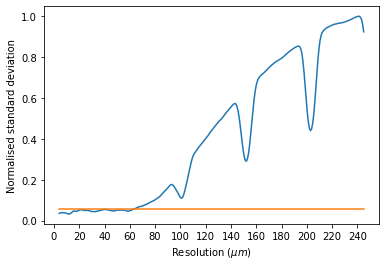

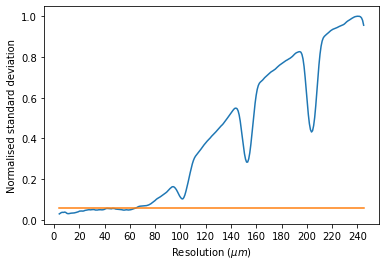

Horizontal 60.60606060606061
Test361


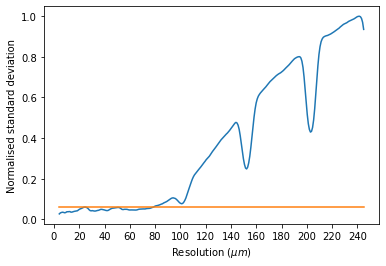

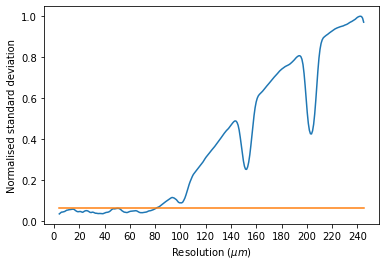

Vertical 75.75757575757576


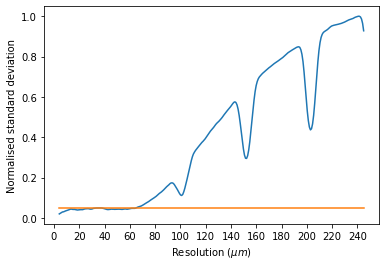

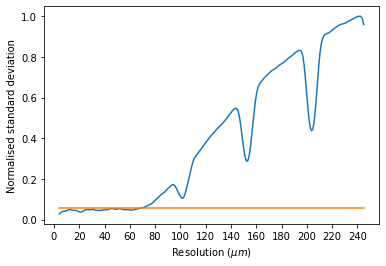

Horizontal 62.710437710437716
Test362


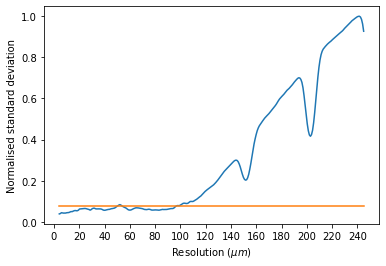

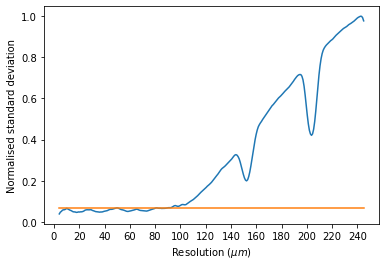

Vertical 85.01683501683502


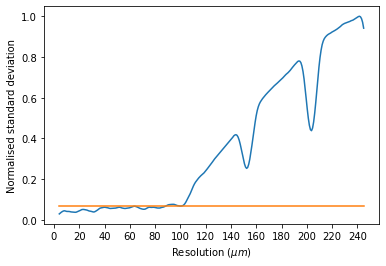

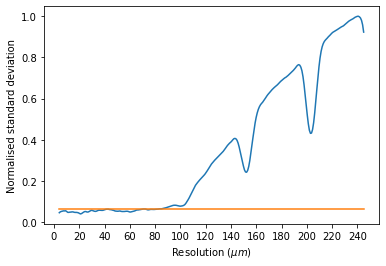

Horizontal 76.17845117845118
Test363


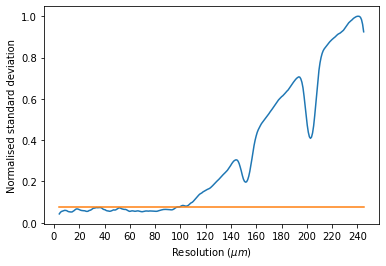

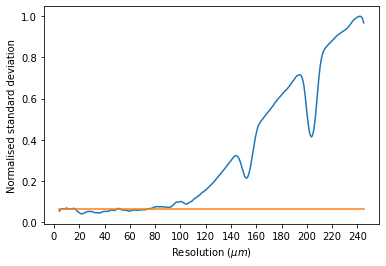

Vertical 82.4915824915825


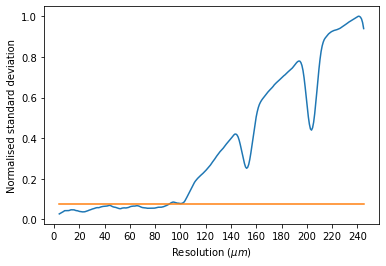

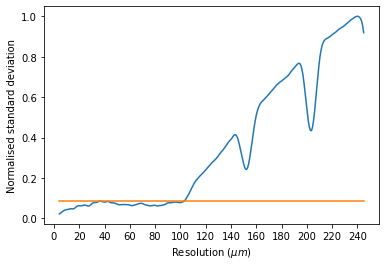

Horizontal 93.01346801346801
Test364


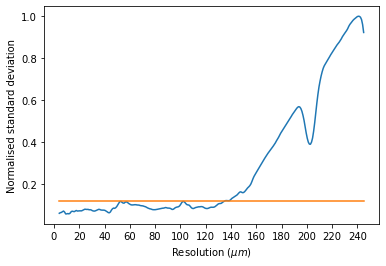

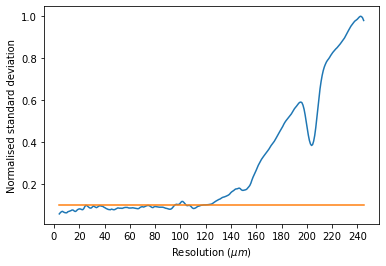

Vertical 111.53198653198655


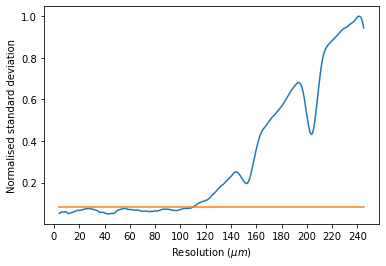

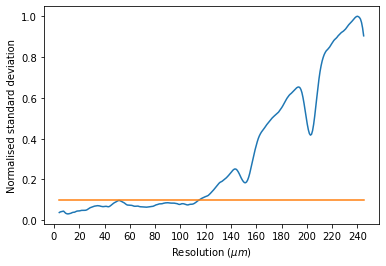

Horizontal 108.58585858585859
Test365


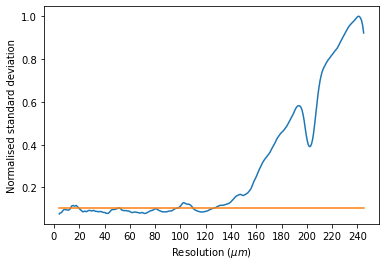

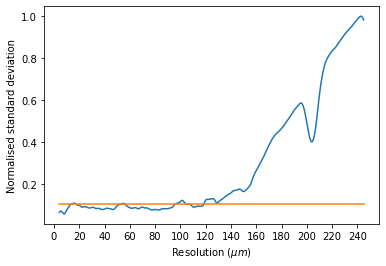

Vertical 92.5925925925926


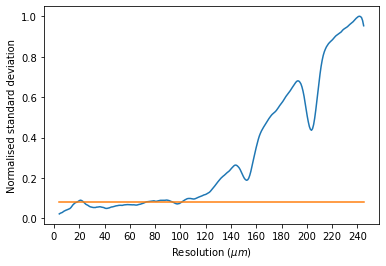

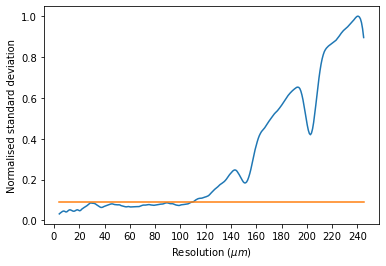

Horizontal 86.7003367003367
Test366


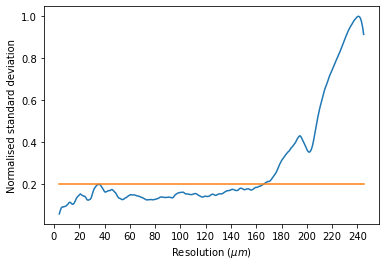

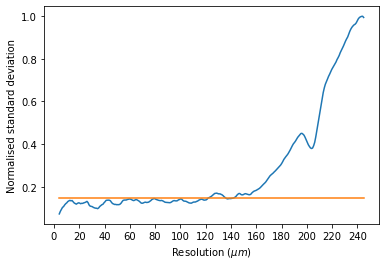

Vertical 140.15151515151516


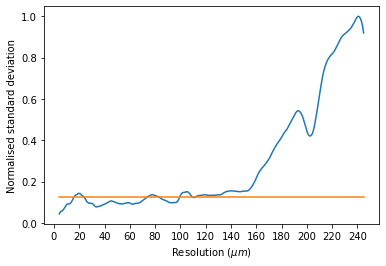

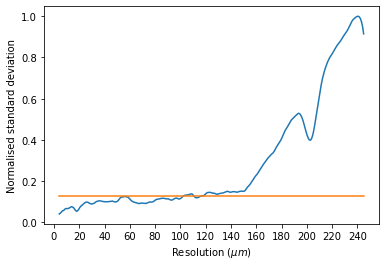

Horizontal 83.75420875420876
Test367


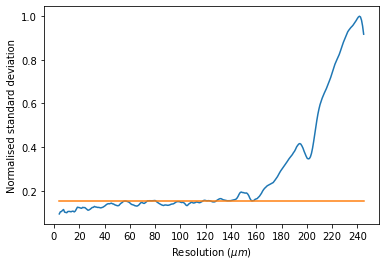

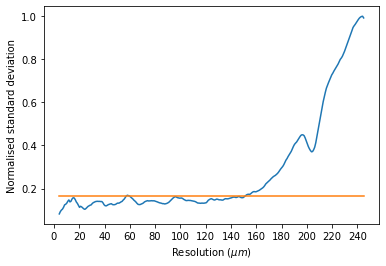

Vertical 111.11111111111111


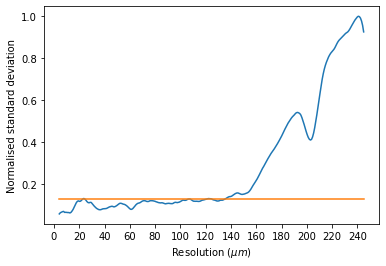

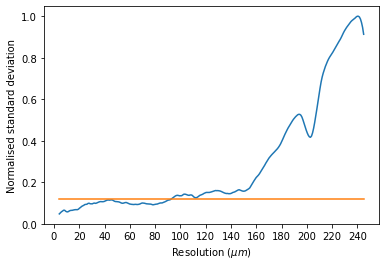

Horizontal 95.11784511784512
Test368


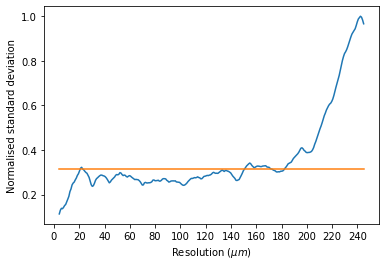

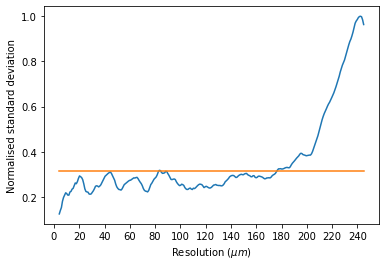

Vertical 113.21548821548822


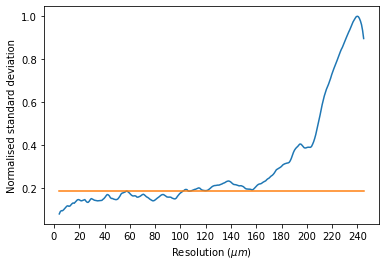

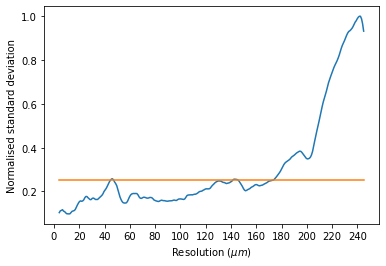

Horizontal 117.42424242424244
Test369


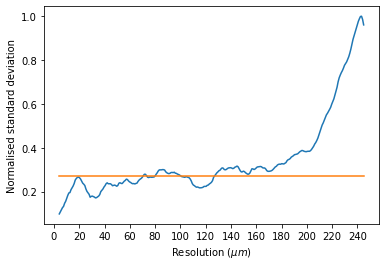

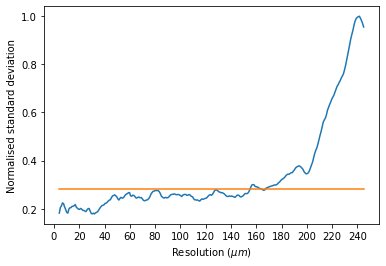

Vertical 109.42760942760944


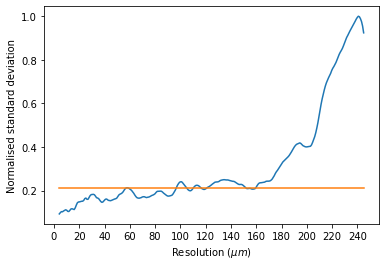

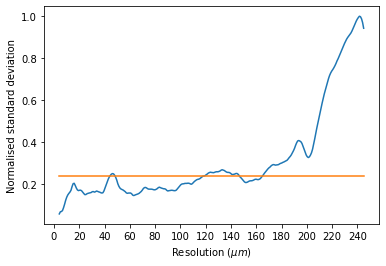

Horizontal 103.95622895622895
Test370


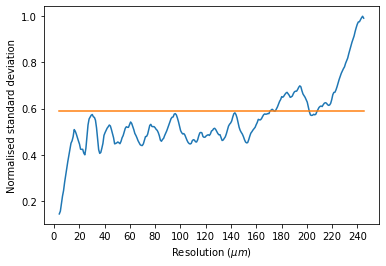

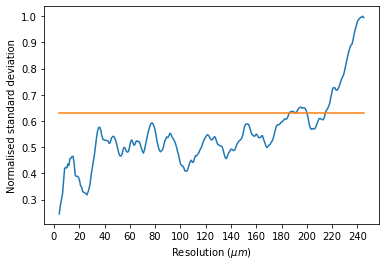

Vertical 174.24242424242425


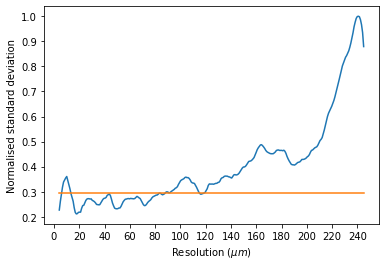

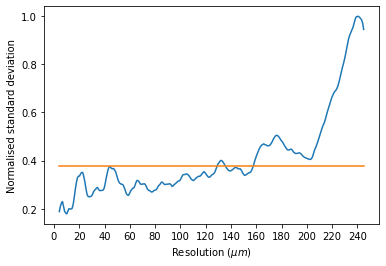

Horizontal 102.27272727272728
Test371


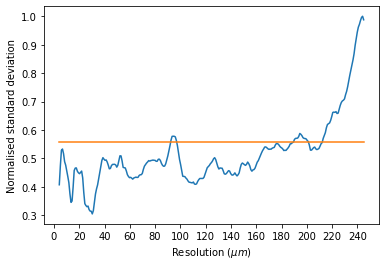

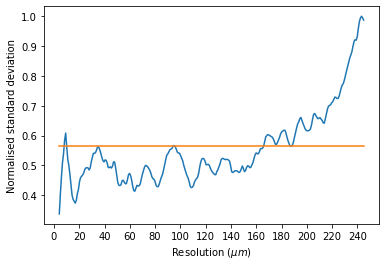

Vertical 89.22558922558923


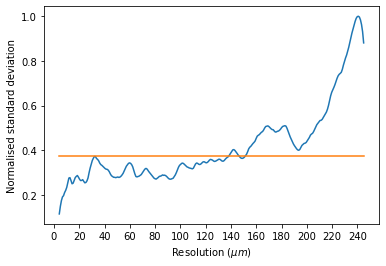

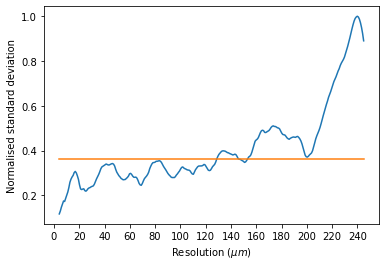

Horizontal 130.05050505050508
Test372


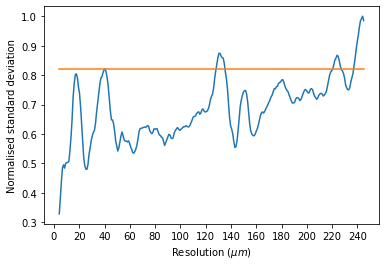

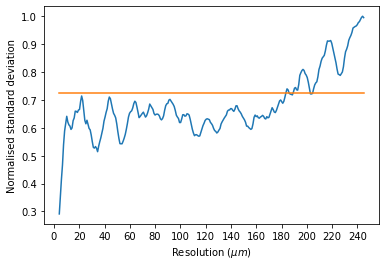

Vertical 151.93602693602693


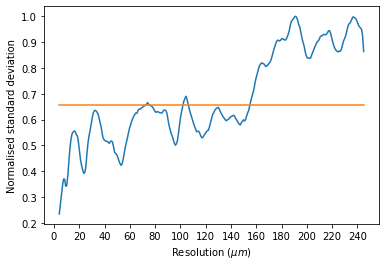

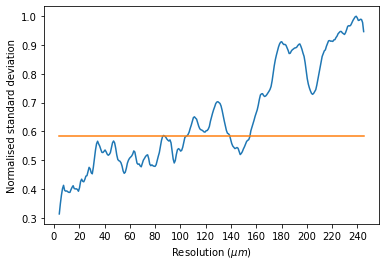

Horizontal 75.33670033670035
Test373


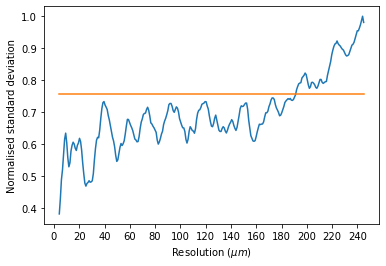

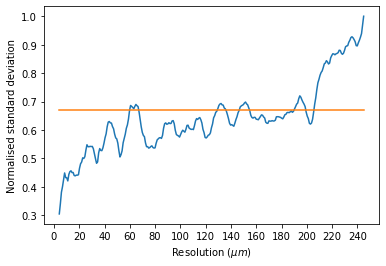

Vertical 124.15824915824916


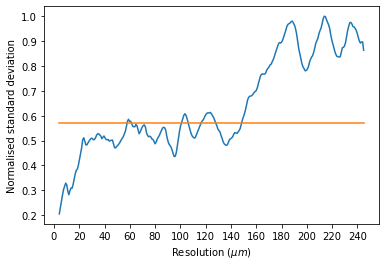

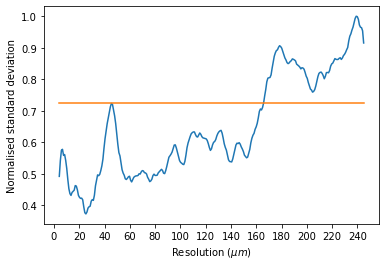

Horizontal 129.62962962962965
Test374


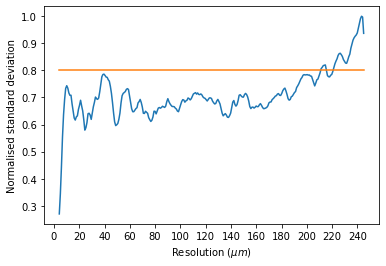

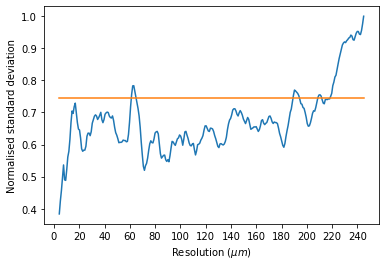

Vertical 133.83838383838383


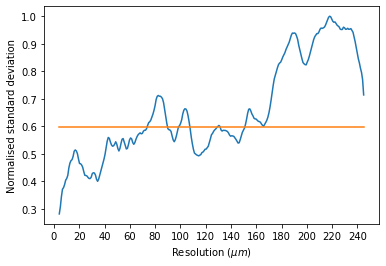

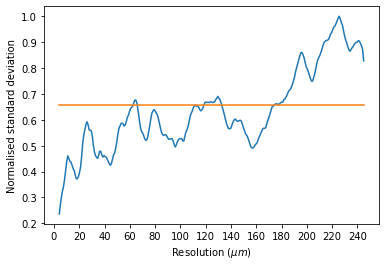

Horizontal 65.23569023569024
Test375


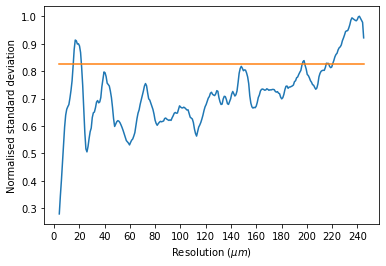

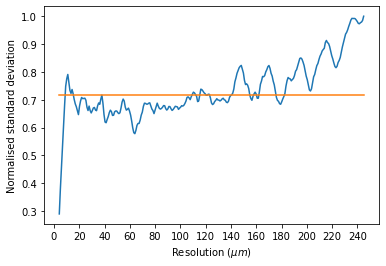

Vertical 148.98989898989902


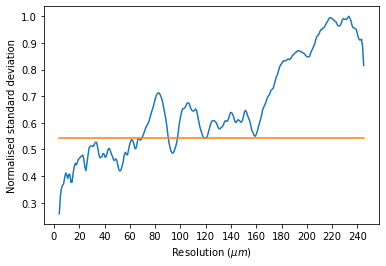

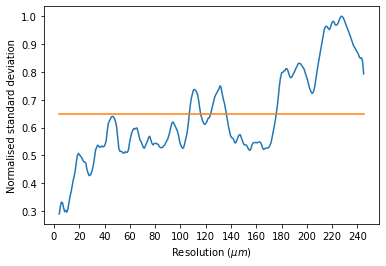

Horizontal 84.5959595959596


In [19]:
folder = "PSI/Novembre_2021/Position_1_tif/Reslice_Siemens/"
array = []
for i in range(16):
    array.append("Test"+str(360+i))
for element in array:
    image=plt.imread(folder+str(element)+".tif")

    image1 = image[:int(len(image)/4),:]
    image2 = image[int(len(image)/4):2*int(len(image)/4),:]
    image3 = image[2*int(len(image)/4):3*int(len(image)/4),:]
    image4 = image[3*int(len(image)/4):,:]
    print(element)
    print("Vertical",(single_image(image1)+single_image(image3))/2)
    print("Horizontal",(single_image(image2)+single_image(image4))/2)
    print("======")

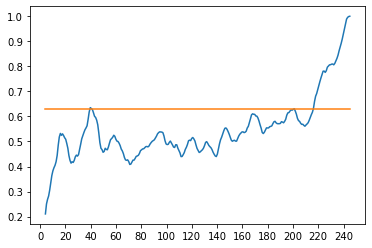

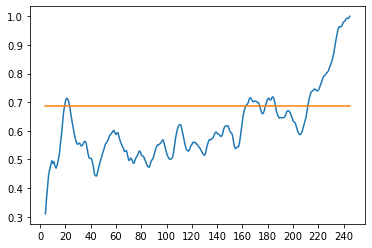

Vertical 177.7871621621622


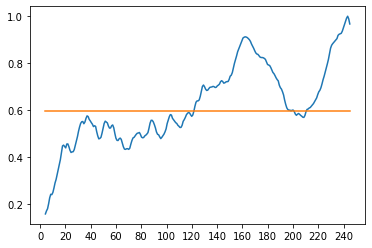

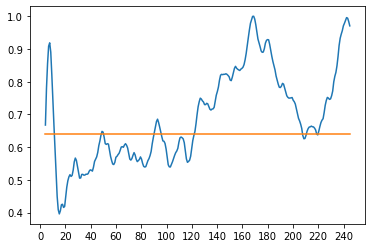

Horizontal 102.19594594594594


In [357]:
element = "Test555"
image=plt.imread(folder+str(element)+".tif")

image1 = image[:int(len(image)/4),:]
image2 = image[int(len(image)/4):2*int(len(image)/4),:]
image3 = image[2*int(len(image)/4):3*int(len(image)/4),:]
image4 = image[3*int(len(image)/4):,:]

print("Vertical",(single_image(image1)+single_image(image3))/2)
print("Horizontal",(single_image(image2)+single_image(image4))/2)

In [27]:
os.listdir("PSI/Novembre_2021")
my_data = genfromtxt('PSI/Novembre_2021/Values.csv', delimiter=',')
print(my_data[:,3])

[   nan -0.5    0.875 ...  6.5    3.5    2.   ]


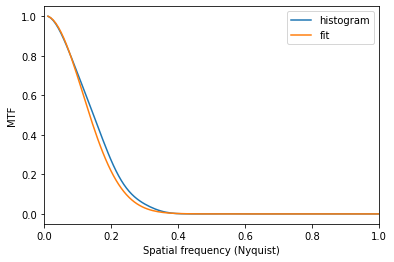

In [44]:
my_data = genfromtxt('PSI/Novembre_2021/Fit.csv', delimiter=',')
plt.plot(my_data[:,0][2:],my_data[:,1][2:],label="histogram")
plt.plot(my_data[:,0][2:],my_data[:,2][2:],label="fit")
plt.legend()
plt.xlabel("Spatial frequency (Nyquist)")
plt.ylabel("MTF")
plt.xlim(0,1)
plt.show()
plt.close()

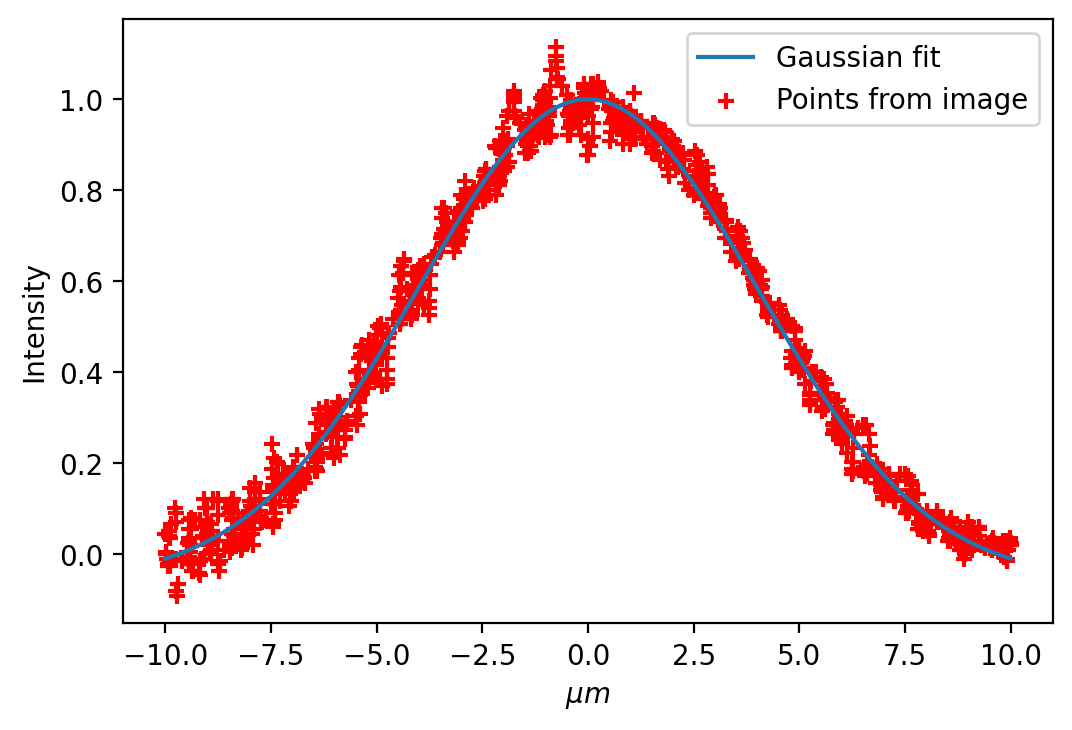

In [48]:
my_data = genfromtxt('PSI/Novembre_2021/Values.csv', delimiter=',')
data_array = []
x_array = []
for i in range(len(my_data[:,1])):
    if not np.isnan(my_data[:,1][i]):
        data_array.append(my_data[:,1][i])
        x_array.append(my_data[:,0][i])
figure(figsize=(6,4), dpi=200)
plt.scatter(my_data[:,2][2:],my_data[:,3][2:]/np.max(data_array),marker="+",color="red",label="Points from image")
plt.plot(x_array,data_array/np.max(data_array),label="Gaussian fit")
plt.xlabel("$\mu m$")
plt.ylabel("Intensity")
plt.legend()
plt.show()
plt.close()

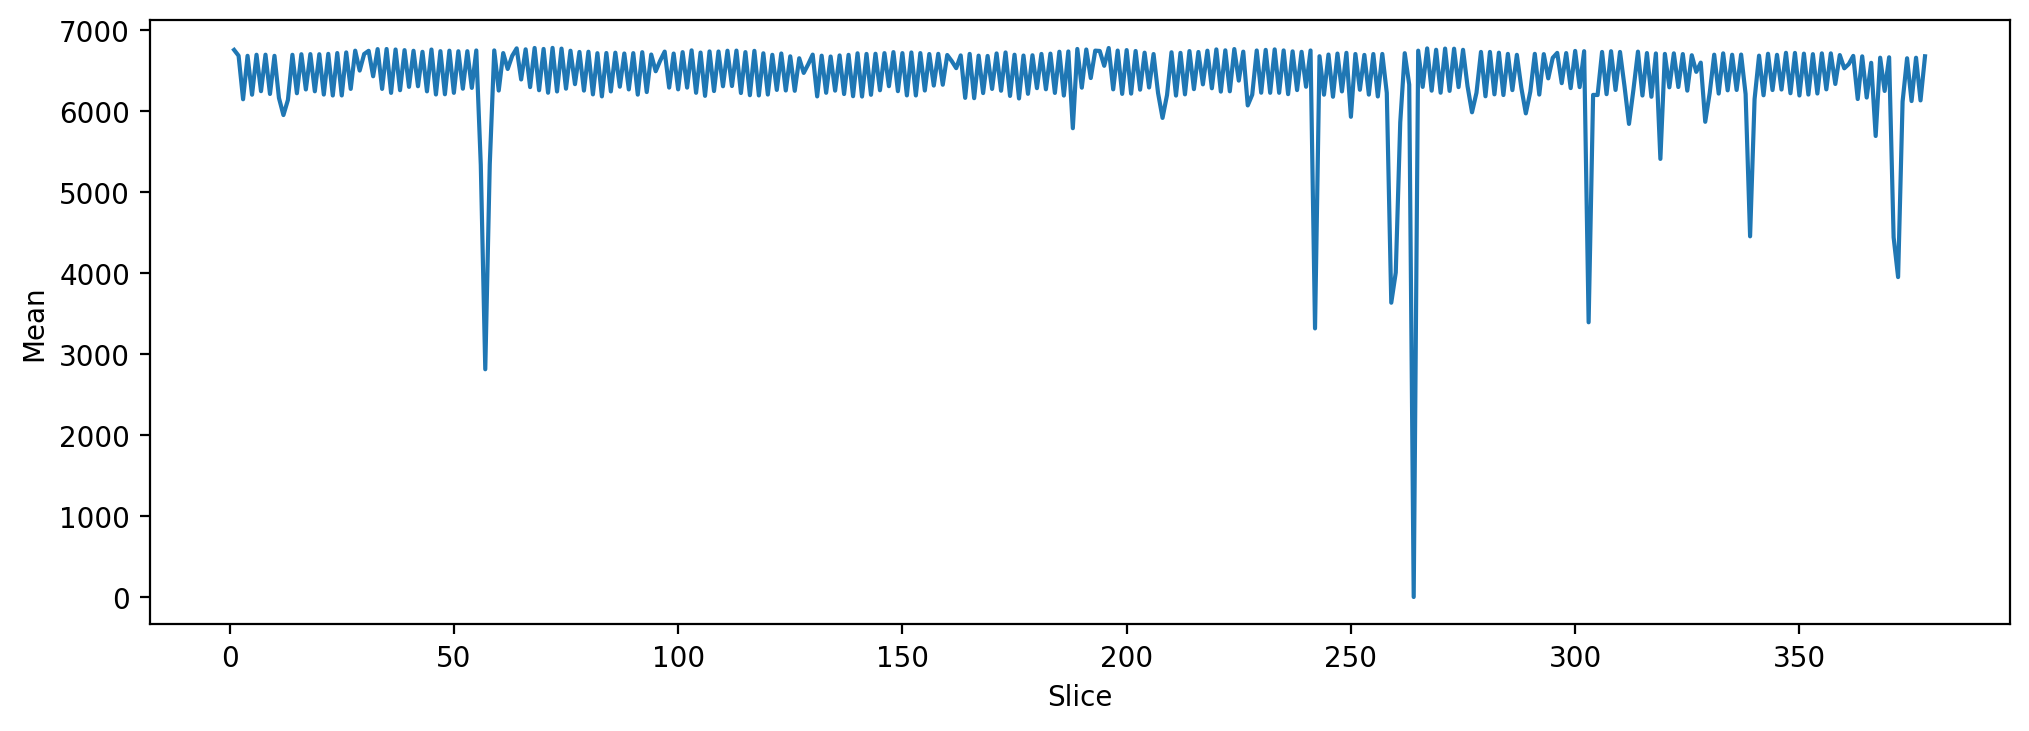

In [57]:
my_data = genfromtxt('PSI/Novembre_2021/TomoValues.csv', delimiter=',')
figure(figsize=(12,4), dpi=200)
plt.plot(my_data[:,0][1:],my_data[:,1][1:],label="Plot")
#plt.legend()
plt.xlabel("Slice")
plt.ylabel("Mean")
plt.show()
plt.close()

In [52]:
print(my_data)

[[         nan          nan]
 [1.000000e+00 6.758526e+03]
 [2.000000e+00 6.686729e+03]
 [3.000000e+00 6.148655e+03]
 [4.000000e+00 6.685432e+03]
 [5.000000e+00 6.205084e+03]
 [6.000000e+00 6.698460e+03]
 [7.000000e+00 6.248525e+03]
 [8.000000e+00 6.699475e+03]
 [9.000000e+00 6.214229e+03]
 [1.000000e+01 6.685155e+03]
 [1.100000e+01 6.164170e+03]
 [1.200000e+01 5.953472e+03]
 [1.300000e+01 6.140618e+03]
 [1.400000e+01 6.697951e+03]
 [1.500000e+01 6.222992e+03]
 [1.600000e+01 6.704947e+03]
 [1.700000e+01 6.269855e+03]
 [1.800000e+01 6.706393e+03]
 [1.900000e+01 6.247157e+03]
 [2.000000e+01 6.704986e+03]
 [2.100000e+01 6.206945e+03]
 [2.200000e+01 6.709435e+03]
 [2.300000e+01 6.195268e+03]
 [2.400000e+01 6.719570e+03]
 [2.500000e+01 6.195769e+03]
 [2.600000e+01 6.727425e+03]
 [2.700000e+01 6.276866e+03]
 [2.800000e+01 6.748889e+03]
 [2.900000e+01 6.503021e+03]
 [3.000000e+01 6.707793e+03]
 [3.100000e+01 6.747382e+03]
 [3.200000e+01 6.432727e+03]
 [3.300000e+01 6.768213e+03]
 [3.400000e+01